In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))
print("hello")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

hello


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-03-09 18:44:32.927754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741526072.938802   36413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741526072.942041   36413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:44:32.953060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def build_alexnet(input_shape=(224, 224, 3)):
    # Define the input layer
    inputs = layers.Input(shape=input_shape)

    # Layer 1: Convolutional Layer
    x = layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Layer 2: Convolutional Layer
    x = layers.Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Layer 3: Convolutional Layer
    x = layers.Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)

    # Layer 4: Convolutional Layer
    x = layers.Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)

    # Layer 5: Convolutional Layer
    x = layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Flatten the output of the convolutional base
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(8, activation='softmax')(x)   

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build the AlexNet model
model = build_alexnet(input_shape=(224, 224, 3))

I0000 00:00:1741526074.359558   36413 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1644 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
for layer in model.layers:
    if isinstance(layer, Flatten):  # Stop freezing at the Flatten layer
        break
    layer.trainable = False

In [5]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,779,784 (178.45 MB)

 Trainable params: 43,032,584 (164.16 MB)

 Non-trainable params: 3,747,200 (14.29 MB)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator (for rescaling)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/train',   # Path to train folder
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)


Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [8]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741526076.462641   36507 service.cc:148] XLA service 0x7f8e28002950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741526076.462672   36507 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-03-09 18:44:36.488157: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741526076.603353   36507 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/88 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1077 - loss: 2.3534

I0000 00:00:1741526079.354559   36507 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1550 - loss: 2.1229

2025-03-09 18:44:43.894439: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130', 236 bytes spill stores, 236 bytes spill loads

2025-03-09 18:44:43.896813: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130', 196 bytes spill stores, 196 bytes spill loads

2025-03-09 18:44:43.911215: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137', 200 bytes spill stores, 200 bytes spill loads



88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.1575 - loss: 2.1155 - val_accuracy: 0.3775 - val_loss: 1.4586
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3611 - loss: 1.5197 - val_accuracy: 0.4837 - val_loss: 1.3322
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4261 - loss: 1.4212 - val_accuracy: 0.4775 - val_loss: 1.3078
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4599 - loss: 1.3264 - val_accuracy: 0.5888 - val_loss: 1.1499
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4919 - loss: 1.2606 - val_accuracy: 0.5437 - val_loss: 1.1501
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5231 - loss: 1.2024 - val_accuracy: 0.6062 - val_loss: 1.0656
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5117 - loss: 1.2210 - val_accuracy: 0.6162 - val_loss: 1.0868
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5052 - loss: 1.2060 - val_accuracy: 0.6025 - val_loss: 1.

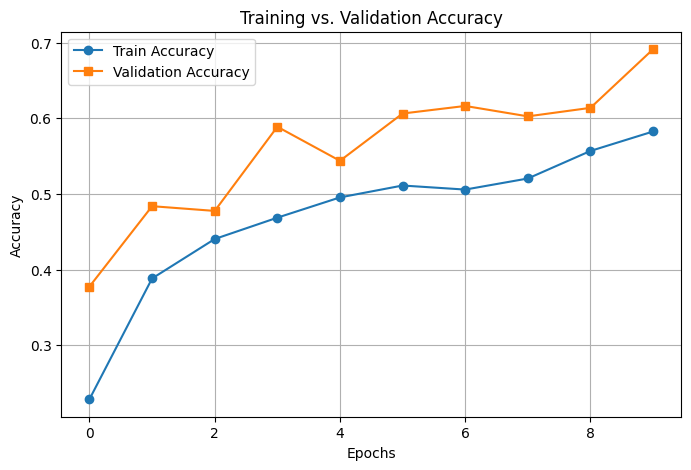

In [9]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

10/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7256 - loss: 0.8555

2025-03-09 18:45:07.562383: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137_0', 4 bytes spill stores, 4 bytes spill loads

2025-03-09 18:45:07.735562: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130_0', 232 bytes spill stores, 232 bytes spill loads



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7157 - loss: 0.8695
Test accuracy: 0.6750
